# Capstone Project

## Trump Twitter Analysis and Predictability of Stock Market (SPY) Move 

### Problem Statement

The idea for this project stemmed from my previous job.  Ever since the announcement and further election of current President of the United States Donald Trump, I became amazed at the way a man in position of power used social media, specifically Twitter, to express his views and thoughts.  With every passing day information is more easily accessible and with that much more easy to spread.  Because of this, I thought it would be a great idea to analyze Donald Trump's twitter feed and see if there is any type of correlation in a stock market move.  To gauge this, I used the exchange traded fund (etf) SPY.  This etf is connected with the bigger SP500 and mirrors the same moves up and down.  

### Executive Summary

First and foremost, I will state that I am not a financial advisor and the results of this project should not be used to make financial decisions. Please consult one if you would like further information...

The goal for this project is to take Donald Trump's twitter texts and dissect and anaylze them.  I used a Count Vectorizer and VADER analysis to do this.  In doing so, I plan to look for words that correlate postively or negatively to moves in SPY etf.  Using the analyzed text data, I used each day's SPY data (Open, High, Low, Close, and Volume) and its numerical features to gauge the impact of the twitter texts.  Having this framework, the ultimate goal is to be able to take a tweet from President Trump and then be able to accurately predict a move in the SPY etf either postively or negatively.  

The data collected from this project came from two different sources.  One is all of Donald Trump's twitter feed dating back to June 15, 2015 and going to August 20, 2019 (the last day collected for this project).  Together this accounted for over 17,000 tweets and instagram posts.  The data for this was taken from the website http://www.trumptwitterarchive.com/archive and using the parameters of the dates posted above.  This data was parsed and then exported via csv.  The other data needed for this project was market data on the SPY etf.  This includes the open, high, low, close, and volume for each day.  To get this, I used the yahoo website https://finance.yahoo.com/quote/SP/history?p=SP and exported this data via csv.  Once I had both csv's, I was able to import them both into a jupyter notebook and my analysis could begin.  Additional data and charts were used at www.stockcharts.com.

To create this into a classification problem, I created a new column called 'up_day'.  This column would be my target variable for each of my models going forward.  To create it, I took the Close price for each day of the SPY and with the Datetime index, I used a .pct_change() method for all the numerical data.  This would simply tell you the percent change move from the day previous.  Any positive number would be considered a positive move in the market, or an "up day."  Any negative number would be considered a negative move in market, or "down day." To get this into binary terms, I made an up_day equal to 1 and down_day equal to 0.  

Exploratory Data Analysis, or EDA, on the data took longer and was much more involved than I originally thought it would be.  After taking out the columns that I felt were an unncessary fit for my problem and working around a few nulls, my biggest problems came from using Datetime as an index as well as combining all of the text data together.  The first problem of Datetime indexing was hard but necessary as it was the only similar column within both data sets that I would be able to group on.  Once I joined the data sets together on date, the next problem that came up was what to do with the multiple texts that came from each day.  Since the same amount of texts weren't printed each day, I felt the best way to take care of the unbalanced issue was to take each days worth of tweets and combine them into one single string of text.  From here, my data would consist of the SPY market data and the grouped together tweets from that day. The texts from the tweets would undergo some sentiment analysis to determine the "feeling" of it. I used Valence Aware Dictionary and sEntiment Analysis, or VADER, to do this and added this info back into the data set. My text dissection wasn't complete yet.  Next I used a Count Vectorizer to find the most used and correlated words within all the text.  After a lot of trial and error, the parameters kept that performed the best were keeping stopwords in, having max features at 12,000, and having an n gram range of 3. 

The models used in this project were two types of Logistic Regression, a Gradient Boost Classifier, and a Random Forest Classifier.  All models used the metric of accuracy score to show whether they were a good at predicting an up SPY move or not.  The baseline accuracy score came out to be 54.18% and would be used to compare all the models against one another. This  score makes sense since if one looks at a chart of the SPY or even the overall market, the trend is to the positive just slightly.   

The first logistic model performed was a basic one with default parameters and had an accuracy score of 50%.  This was worse than the baseline model. I then used Gridsearch to find the best parameters and the best logistic regression model came with lasso regularization.  The accuracy score was 57% so just slightly better than baseline model.  With this model, I found the highest and lowest coefficient words within the texts of the tweets and market data in general.  The words with the highest likelihood of having an up SPY move were "healthcare", "york", "hillary clinton", "meeting", "mexico", "republican", and "border".  The words with the lowest likelihood for an up move (so highest for a down move in SPY) were Volume column, "justice", "president trump", "honor", "ohio", "wall", "country", "security", and "joe".  These words for the most part don't have large odds of predicting the move in the SPY etf.  Most of them though had odds very low and close to 0 likelihood of predicting correctly.  However the top words out of these lists for an up move were "healthcare" with a 1.23 chance of being positive if mentioned in tweet, followed by "hillary clinton" with 1.11, "meeting" with 1.08, and "mexico" with 1.07.  For a negative move in SPY, the Volume column had highest correlation out of not only least correlated, but of all the potential coefficients. A higher volume on a date had odds of 1.59 more likely being a down day, followed by "justice" with 1.27, and "president trump" with 1.15.   

Moving on to the other models, I used the same data into a Gradient Boost Classifier and a Random Forest model.  The accuracy scores for both of these were much better than the logistic model and the baseline.  The random forest model gave an accuracy score of 65% and the Gradient Boost model gave the best accuracy score of the bunch with 81%.  I ended up using this model and the logistic regression for my analyses.  The gradient boost because of its high accuracy and the logistic regression becuase of its interpretability. I performed confusion matrices on these and also got ROC AUC scores for them.  Gradient boost model yielded a score of 0.87 and the logistic model gave 0.55.  The goal for this score is to be as close to 1 as possible.  The closer to 1, the better the model is at classifying between the two classes (up day vs no up day).

After performing all of the modeling and looking at the results, it is hard to say whether the impact a tweet has an impact on a move in the SPY or stock market.  I do believe that certain tweets had a large impact, however, with combining all of the tweets from each day together, I feel that impact may have been died down.  This I believe is a large downside to this overall project and further knowledge of use in TimeSeries would be key in alleviating that issue.  One good thing picked up though was that certain topics were talked about around major market moves, both up and down.  This allowed for the logistic regression model to find the top coefficients talked about above.  Seeing Volume column having the highest absolute value coefficient wasn't surprising, especially to the downside.  This is because most down days in the market have the highest amounts of volume.  With the markets crumbling down, investors are forced to manage their positions as they change.  "Healthcare" being the top positive coefficient was interesting.  I guess that means seemingly most people are excited about that field and what can come from it.  With all this being said, this model still needs much more work but I do believe the model can work well at predicting SPY moves with better text analyses and the ability to work with TimeSeries better.  


## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import demoji
import emoji
import regex
import time
import gensim

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics

In [2]:
# Importing SPY historical data from Yahoo Finance.  
# Dates back to June 14, 2015, the date before Donald Trump announced Presidential run.
spy_data = pd.read_csv('SPY.csv')
spy_data.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-06-15,208.639999,209.449997,207.789993,209.110001,192.159103,124384200
1,2015-06-16,208.929993,210.350006,208.720001,210.250000,193.206757,85308200
2,2015-06-17,210.589996,211.320007,209.360001,210.589996,193.519150,126708600


In [3]:
spy_data.shape

(1053, 7)

### Importing Donald Trump twitter data

In [4]:
trump = pd.read_csv('trump_data.csv')
trump.head(3)

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str
0,Twitter for iPhone,Nobody ever heard of this dope until he met me...,08-20-2019 02:51:08,17323.0,71509.0,False,1.163645e+18
1,Twitter for iPhone,I promise not to do this to Greenland! https:/...,08-20-2019 00:07:14,61574.0,269528.0,False,1.163603e+18
2,Twitter for iPhone,Thank you to my great supporters at the 2019 @...,08-20-2019 00:04:57,13283.0,60576.0,False,1.163603e+18


In [5]:
trump.shape

(17095, 7)

In [6]:
trump.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17095 entries, 0 to 17094
Data columns (total 7 columns):
source            17095 non-null object
text              17095 non-null object
created_at        17094 non-null object
retweet_count     17094 non-null float64
favorite_count    17094 non-null float64
is_retweet        17036 non-null object
id_str            17094 non-null float64
dtypes: float64(3), object(4)
memory usage: 935.0+ KB


In [7]:
trump['created_at'] = pd.to_datetime(trump['created_at'])

In [8]:
trump.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17095 entries, 0 to 17094
Data columns (total 7 columns):
source            17095 non-null object
text              17095 non-null object
created_at        17094 non-null datetime64[ns]
retweet_count     17094 non-null float64
favorite_count    17094 non-null float64
is_retweet        17036 non-null object
id_str            17094 non-null float64
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 935.0+ KB


In [9]:
trump.head(3)

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str
0,Twitter for iPhone,Nobody ever heard of this dope until he met me...,2019-08-20 02:51:08,17323.0,71509.0,False,1.163645e+18
1,Twitter for iPhone,I promise not to do this to Greenland! https:/...,2019-08-20 00:07:14,61574.0,269528.0,False,1.163603e+18
2,Twitter for iPhone,Thank you to my great supporters at the 2019 @...,2019-08-20 00:04:57,13283.0,60576.0,False,1.163603e+18


In [10]:
trump['day'] = trump['created_at'].dt.date
trump.head(3)

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str,day
0,Twitter for iPhone,Nobody ever heard of this dope until he met me...,2019-08-20 02:51:08,17323.0,71509.0,False,1.163645e+18,2019-08-20
1,Twitter for iPhone,I promise not to do this to Greenland! https:/...,2019-08-20 00:07:14,61574.0,269528.0,False,1.163603e+18,2019-08-20
2,Twitter for iPhone,Thank you to my great supporters at the 2019 @...,2019-08-20 00:04:57,13283.0,60576.0,False,1.163603e+18,2019-08-20


In [11]:
trump.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17095 entries, 0 to 17094
Data columns (total 8 columns):
source            17095 non-null object
text              17095 non-null object
created_at        17094 non-null datetime64[ns]
retweet_count     17094 non-null float64
favorite_count    17094 non-null float64
is_retweet        17036 non-null object
id_str            17094 non-null float64
day               17094 non-null object
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 1.0+ MB


In [12]:
trump['day'] = pd.to_datetime(trump['day'])

In [13]:
trump.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17095 entries, 0 to 17094
Data columns (total 8 columns):
source            17095 non-null object
text              17095 non-null object
created_at        17094 non-null datetime64[ns]
retweet_count     17094 non-null float64
favorite_count    17094 non-null float64
is_retweet        17036 non-null object
id_str            17094 non-null float64
day               17094 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(3), object(3)
memory usage: 1.0+ MB


In [14]:
spy_data.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-06-15,208.639999,209.449997,207.789993,209.110001,192.159103,124384200
1,2015-06-16,208.929993,210.350006,208.720001,210.250000,193.206757,85308200
2,2015-06-17,210.589996,211.320007,209.360001,210.589996,193.519150,126708600


In [15]:
spy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1053 entries, 0 to 1052
Data columns (total 7 columns):
Date         1053 non-null object
Open         1053 non-null float64
High         1053 non-null float64
Low          1053 non-null float64
Close        1053 non-null float64
Adj Close    1053 non-null float64
Volume       1053 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 57.7+ KB


In [16]:
spy_data.shape

(1053, 7)

### Beginning DateTime 

In [17]:
spy_data['Date'] = pd.to_datetime(spy_data['Date'])

In [18]:
spy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1053 entries, 0 to 1052
Data columns (total 7 columns):
Date         1053 non-null datetime64[ns]
Open         1053 non-null float64
High         1053 non-null float64
Low          1053 non-null float64
Close        1053 non-null float64
Adj Close    1053 non-null float64
Volume       1053 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 57.7 KB


In [19]:
spy_data = spy_data.set_index('Date')
spy_data.head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-06-15,208.639999,209.449997,207.789993,209.110001,192.159103,124384200
2015-06-16,208.929993,210.350006,208.720001,210.250000,193.206757,85308200
2015-06-17,210.589996,211.320007,209.360001,210.589996,193.519150,126708600


In [20]:
spy_data = spy_data.pct_change()

In [21]:
trump = trump.set_index('day')
trump = trump.sort_values('day', ascending=True)
trump.head(3)

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str
day,,,,,,,
2015-06-14,Twitter for Android,@mirrorgrrl: Truly Great men come along only o...,2015-06-14 08:16:00,15.0,45.0,False,6.099977e+17
2015-06-14,Twitter for Android,@FuturisticHub: @realDonaldTrump I'd vote twic...,2015-06-14 21:15:20,56.0,131.0,False,6.101938e+17
2015-06-14,Twitter for Android,@MikeLongoNYC: @realDonaldTrump Happy Birthday...,2015-06-14 18:02:12,28.0,101.0,False,6.101452e+17


In [22]:
trump['source'].value_counts()

Twitter for iPhone         11316
Twitter for Android         4111
Twitter Web Client          1189
Media Studio                 154
Twitter Ads                   97
Twitter Media Studio          66
Twitter for iPad              57
Instagram                     42
Twitter for BlackBerry        37
Twitter QandA                 10
Periscope                      7
Twitter Web App                4
TweetDeck                      2
Mobile Web (M5)                1
Twitter Mirror for iPad        1
Facebook                       1
Name: source, dtype: int64

In [23]:
trump.isnull().sum()

source             0
text               0
created_at         1
retweet_count      1
favorite_count     1
is_retweet        59
id_str             1
dtype: int64

In [24]:
trump.dropna(inplace=True)

In [25]:
trump.isnull().sum()

source            0
text              0
created_at        0
retweet_count     0
favorite_count    0
is_retweet        0
id_str            0
dtype: int64

In [26]:
spy_data.isnull().sum()

Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [27]:
spy_data.shape

(1053, 6)

In [28]:
trump.shape

(17036, 7)

### Merging data frames together

In [29]:
df = pd.merge(spy_data, trump, how='left', left_index=True, right_index=True)
df.head(5)

,Open,High,Low,Close,Adj Close,Volume,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str
2015-06-15,NaN,NaN,NaN,NaN,NaN,NaN,Twitter Web Client,Will do thanks. https://t.co/5Zc3D8YLNs,2015-06-15 16:33:32,18.0,69.0,False,6.104853e+17
2015-06-15,NaN,NaN,NaN,NaN,NaN,NaN,Twitter Web Client,Great! https://t.co/8O3eTKjZrd,2015-06-15 16:31:29,31.0,73.0,False,6.104848e+17
2015-06-15,NaN,NaN,NaN,NaN,NaN,NaN,Twitter Web Client,Thanks. https://t.co/qh8TxiZPlX,2015-06-15 16:30:03,31.0,79.0,False,6.104844e+17
2015-06-15,NaN,NaN,NaN,NaN,NaN,NaN,Periscope,LIVE on #Periscope https://t.co/H8lRtZBGEb,2015-06-15 14:55:16,21.0,53.0,False,6.104606e+17
2015-06-15,NaN,NaN,NaN,NaN,NaN,NaN,Twitter for Android,@realJoeMurray: Hopefully tomorrow is the day ...,2015-06-15 16:36:47,36.0,60.0,False,6.104861e+17


In [30]:
df.shape

(12154, 13)

In [31]:
df['source'].value_counts()

Twitter for iPhone         8079
Twitter for Android        2506
Twitter Web Client         1146
Media Studio                131
Twitter Ads                  85
Twitter Media Studio         63
Twitter for iPad             46
Instagram                    36
Twitter for BlackBerry       18
Twitter QandA                10
Periscope                     6
Twitter Web App               4
TweetDeck                     2
Twitter Mirror for iPad       1
Facebook                      1
Name: source, dtype: int64

### Grabbing the columns that I want for the final dataframe

In [32]:
clean_df = df[['Open', 'High','Low', 'Close', 'Volume', 'text', 'retweet_count', 'favorite_count']]
clean_df.head(5)

,Open,High,Low,Close,Volume,text,retweet_count,favorite_count
2015-06-15,NaN,NaN,NaN,NaN,NaN,Will do thanks. https://t.co/5Zc3D8YLNs,18.0,69.0
2015-06-15,NaN,NaN,NaN,NaN,NaN,Great! https://t.co/8O3eTKjZrd,31.0,73.0
2015-06-15,NaN,NaN,NaN,NaN,NaN,Thanks. https://t.co/qh8TxiZPlX,31.0,79.0
2015-06-15,NaN,NaN,NaN,NaN,NaN,LIVE on #Periscope https://t.co/H8lRtZBGEb,21.0,53.0
2015-06-15,NaN,NaN,NaN,NaN,NaN,@realJoeMurray: Hopefully tomorrow is the day ...,36.0,60.0


In [33]:
clean_df['text'][1:25]

2015-06-15                       Great! https://t.co/8O3eTKjZrd
2015-06-15                     Thanks.  https://t.co/qh8TxiZPlX
2015-06-15           LIVE on #Periscope https://t.co/H8lRtZBGEb
2015-06-15    @realJoeMurray: Hopefully tomorrow is the day ...
2015-06-15    @Subdoc101:Trump said on @foxandfriends today ...
2015-06-15    @ZStr8Up: After the liberal 60's and 70's how ...
2015-06-15    @fyrftr211: @realDonaldTrump #Trump2016. Time ...
2015-06-15    @MediciMario: @realDonaldTrump Pls run u would...
2015-06-15    Tomorrow at 11AM #MakeAmericaGreatAgain https:...
2015-06-16    It is almost time. I will be making a major an...
2015-06-16    Today I officially declared my candidacy for P...
2015-06-16                 Thanks Eric. https://t.co/phUbaTvq8d
2015-06-16       #MakeAmericaGreatAgain https://t.co/JguVmqXqWA
2015-06-16    LIVE on #Periscope: Major announcement! #MakeA...
2015-06-16    Thanks Geraldo you're a champion. https://t.co...
2015-06-16    11AM #MakeAmericaGreatAgai

In [34]:
type(clean_df.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [35]:
clean_df.head()

,Open,High,Low,Close,Volume,text,retweet_count,favorite_count
2015-06-15,NaN,NaN,NaN,NaN,NaN,Will do thanks. https://t.co/5Zc3D8YLNs,18.0,69.0
2015-06-15,NaN,NaN,NaN,NaN,NaN,Great! https://t.co/8O3eTKjZrd,31.0,73.0
2015-06-15,NaN,NaN,NaN,NaN,NaN,Thanks. https://t.co/qh8TxiZPlX,31.0,79.0
2015-06-15,NaN,NaN,NaN,NaN,NaN,LIVE on #Periscope https://t.co/H8lRtZBGEb,21.0,53.0
2015-06-15,NaN,NaN,NaN,NaN,NaN,@realJoeMurray: Hopefully tomorrow is the day ...,36.0,60.0


### Taking the multiple texts from each day and summing them together so they are all together on same day

In [36]:
agg_data = pd.DataFrame(clean_df.groupby(clean_df.index)['text'].sum())
agg_data.head(3)

,text
2015-06-15,Will do thanks. https://t.co/5Zc3D8YLNsGreat!...
2015-06-16,It is almost time. I will be making a major an...
2015-06-17,Speaking to great patriots @MCC_CT. My first v...


### Going to add back in all of the other numerical data to summed up text data

In [37]:
agg_data['Open'] = clean_df.groupby(clean_df.index)['Open'].mean()
agg_data.head(5)

,text,Open
2015-06-15,Will do thanks. https://t.co/5Zc3D8YLNsGreat!...,NaN
2015-06-16,It is almost time. I will be making a major an...,0.001390
2015-06-17,Speaking to great patriots @MCC_CT. My first v...,0.007945
2015-06-18,@JustinBorges1 Trump 4 president...has a nice ...,0.003419
2015-06-19,George Will was a big Iraq fool. $2 trillion ...,0.000710


In [38]:
agg_data['High'] = clean_df.groupby(clean_df.index)['High'].mean()
agg_data['Low'] = clean_df.groupby(clean_df.index)['Low'].mean()
agg_data['Close'] = clean_df.groupby(clean_df.index)['Close'].mean()
agg_data['Volume'] = clean_df.groupby(clean_df.index)['Volume'].mean()
agg_data['retweet_count'] = clean_df.groupby(clean_df.index)['retweet_count'].sum()
agg_data['favorite_count'] = clean_df.groupby(clean_df.index)['favorite_count'].sum()
agg_data.head(5)

,text,Open,High,Low,Close,Volume,retweet_count,favorite_count
2015-06-15,Will do thanks. https://t.co/5Zc3D8YLNsGreat!...,NaN,NaN,NaN,NaN,NaN,384.0,782.0
2015-06-16,It is almost time. I will be making a major an...,0.001390,0.004297,0.004476,0.005452,-0.314156,20935.0,26674.0
2015-06-17,Speaking to great patriots @MCC_CT. My first v...,0.007945,0.004611,0.003066,0.001617,0.485304,2515.0,6304.0
2015-06-18,@JustinBorges1 Trump 4 president...has a nice ...,0.003419,0.009559,0.006066,0.010399,0.309050,937.0,2388.0
2015-06-19,George Will was a big Iraq fool. $2 trillion ...,0.000710,-0.008390,-0.001282,-0.009258,-0.213358,5348.0,9723.0


In [39]:
agg_data.shape

(1053, 8)

### Now time to use VADER for Sentiment Analysis
(Valence Aware Dictionary and sEntiment Analysis)

In [40]:
corpus = list(agg_data['text'])
corpus[0]

'Will do thanks.  https://t.co/5Zc3D8YLNsGreat! https://t.co/8O3eTKjZrdThanks.  https://t.co/qh8TxiZPlXLIVE on #Periscope https://t.co/H8lRtZBGEb@realJoeMurray: Hopefully tomorrow is the day we start to make America great again! Looking forward to it @realDonaldTrump. #Trump2016,06-16-2015 07:04:03,35,75,false,610704372415229952\nInstagram,Do we really need another Bush in the White House--- we have had enough of them. https://t.co/sbUVyBG6KE,06-15-2015 19:12:57,251,353,false,610525417175425024\nTwitter Web Client,Great! https://t.co/U7G3tR4nFS,06-15-2015 16:43:56,37,132,false,610487918478671873\nTwitter Web Client,Thanks.  https://t.co/feCMQ53SwE,06-15-2015 16:42:47,28,92,false,610487629952491520\nTwitter Web Client,@DurandSentinus @JebBush may get headlines today but @realDonaldTrump will dominate news for week regardless of his announcement tomorrow"@Subdoc101:Trump said on @foxandfriends today PPL are asking why would anyone give up his lifestyle to be #POTUS. The answer is #TRUMPC

In [41]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/alexbell/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [42]:
#instantiate SIA
sia = SentimentIntensityAnalyzer()

#Get polarity scores for the first tweet
sia.polarity_scores(corpus[0])

{'neg': 0.039, 'neu': 0.843, 'pos': 0.117, 'compound': 0.9301}

In [43]:
# Going through each tweet and assigning sentiment scores
dicts = []    

for tweet in corpus:
    scores = sia.polarity_scores(str(tweet))
    scores['text'] = tweet
    dicts.append(scores)

vader_df = pd.DataFrame(dicts)
vader_df.head(5)

,compound,neg,neu,pos,text
0,0.9301,0.039,0.843,0.117,Will do thanks. https://t.co/5Zc3D8YLNsGreat!...
1,0.9979,0.036,0.729,0.234,It is almost time. I will be making a major an...
2,0.9862,0.043,0.732,0.224,Speaking to great patriots @MCC_CT. My first v...
3,0.7712,0.050,0.823,0.127,@JustinBorges1 Trump 4 president...has a nice ...
4,0.9851,0.097,0.758,0.145,George Will was a big Iraq fool. $2 trillion ...


In [44]:
vader_df.shape

(1053, 5)

### Adding sentiment data to final data frame

In [45]:
agg_data['compound'] = vader_df['compound'].values
agg_data['neg'] = vader_df['neg'].values
agg_data['neu'] = vader_df['neu'].values
agg_data['pos'] = vader_df['pos'].values
agg_data.head()

,text,Open,High,Low,Close,Volume,retweet_count,favorite_count,compound,neg,neu,pos
2015-06-15,Will do thanks. https://t.co/5Zc3D8YLNsGreat!...,NaN,NaN,NaN,NaN,NaN,384.0,782.0,0.9301,0.039,0.843,0.117
2015-06-16,It is almost time. I will be making a major an...,0.001390,0.004297,0.004476,0.005452,-0.314156,20935.0,26674.0,0.9979,0.036,0.729,0.234
2015-06-17,Speaking to great patriots @MCC_CT. My first v...,0.007945,0.004611,0.003066,0.001617,0.485304,2515.0,6304.0,0.9862,0.043,0.732,0.224
2015-06-18,@JustinBorges1 Trump 4 president...has a nice ...,0.003419,0.009559,0.006066,0.010399,0.309050,937.0,2388.0,0.7712,0.050,0.823,0.127
2015-06-19,George Will was a big Iraq fool. $2 trillion ...,0.000710,-0.008390,-0.001282,-0.009258,-0.213358,5348.0,9723.0,0.9851,0.097,0.758,0.145


In [46]:
agg_data.shape

(1053, 12)

In [47]:
agg_data['reg_text'] = agg_data['text'].str.lower()

In [48]:
agg_data['reg_text'][0]

'will do thanks.  https://t.co/5zc3d8ylnsgreat! https://t.co/8o3etkjzrdthanks.  https://t.co/qh8txizplxlive on #periscope https://t.co/h8lrtzbgeb@realjoemurray: hopefully tomorrow is the day we start to make america great again! looking forward to it @realdonaldtrump. #trump2016,06-16-2015 07:04:03,35,75,false,610704372415229952\ninstagram,do we really need another bush in the white house--- we have had enough of them. https://t.co/sbuvybg6ke,06-15-2015 19:12:57,251,353,false,610525417175425024\ntwitter web client,great! https://t.co/u7g3tr4nfs,06-15-2015 16:43:56,37,132,false,610487918478671873\ntwitter web client,thanks.  https://t.co/fecmq53swe,06-15-2015 16:42:47,28,92,false,610487629952491520\ntwitter web client,@durandsentinus @jebbush may get headlines today but @realdonaldtrump will dominate news for week regardless of his announcement tomorrow"@subdoc101:trump said on @foxandfriends today ppl are asking why would anyone give up his lifestyle to be #potus. the answer is #trumpc

In [49]:
type(agg_data['reg_text'][0])

str

In [50]:
agg_data.head(3)

,text,Open,High,Low,Close,Volume,retweet_count,favorite_count,compound,neg,neu,pos,reg_text
2015-06-15,Will do thanks. https://t.co/5Zc3D8YLNsGreat!...,NaN,NaN,NaN,NaN,NaN,384.0,782.0,0.9301,0.039,0.843,0.117,will do thanks. https://t.co/5zc3d8ylnsgreat!...
2015-06-16,It is almost time. I will be making a major an...,0.001390,0.004297,0.004476,0.005452,-0.314156,20935.0,26674.0,0.9979,0.036,0.729,0.234,it is almost time. i will be making a major an...
2015-06-17,Speaking to great patriots @MCC_CT. My first v...,0.007945,0.004611,0.003066,0.001617,0.485304,2515.0,6304.0,0.9862,0.043,0.732,0.224,speaking to great patriots @mcc_ct. my first v...


## Now have data set configured and time for natural language processing on text column.

In [51]:
# Learned a lot about Regex here and found there are a ton of nuances in English language. 
# Could probably find a much easier way to do this...

In [52]:
agg_data['reg_text'] = agg_data['reg_text'].replace('http\S+', '', regex=True).replace('www\S+', '', regex=True).replace('\n\n\S+', '', regex=True).replace('#\S+','', regex = True).replace('\n\S+', '', regex=True).replace('\n\n\n\S+','',regex=True).replace(',', ' ', regex=True).replace('!', ' ', regex=True).replace('\?', ' ',regex=True)

In [53]:
agg_data['reg_text'] = agg_data['reg_text'].str.replace('\d+','').replace("\\'s",'', regex=True).replace('\-', ' ', regex=True).replace('\:', '', regex=True).replace('\xa0',' ', regex=True)

In [54]:
agg_data['reg_text'] = agg_data['reg_text'].str.replace('\"',' ', regex=True).replace("\'", ' ', regex=True).replace('\.',' ', regex=True)

In [55]:
agg_data['text'][0]

'Will do thanks.  https://t.co/5Zc3D8YLNsGreat! https://t.co/8O3eTKjZrdThanks.  https://t.co/qh8TxiZPlXLIVE on #Periscope https://t.co/H8lRtZBGEb@realJoeMurray: Hopefully tomorrow is the day we start to make America great again! Looking forward to it @realDonaldTrump. #Trump2016,06-16-2015 07:04:03,35,75,false,610704372415229952\nInstagram,Do we really need another Bush in the White House--- we have had enough of them. https://t.co/sbUVyBG6KE,06-15-2015 19:12:57,251,353,false,610525417175425024\nTwitter Web Client,Great! https://t.co/U7G3tR4nFS,06-15-2015 16:43:56,37,132,false,610487918478671873\nTwitter Web Client,Thanks.  https://t.co/feCMQ53SwE,06-15-2015 16:42:47,28,92,false,610487629952491520\nTwitter Web Client,@DurandSentinus @JebBush may get headlines today but @realDonaldTrump will dominate news for week regardless of his announcement tomorrow"@Subdoc101:Trump said on @foxandfriends today PPL are asking why would anyone give up his lifestyle to be #POTUS. The answer is #TRUMPC

In [56]:
agg_data['reg_text'][0]

'will do thanks       on   hopefully tomorrow is the day we start to make america great again  looking forward to it @realdonaldtrump      false  we really need another bush in the white house    we have had enough of them      false  web client great      false  web client thanks       false  web client @durandsentinus @jebbush may get headlines today but @realdonaldtrump will dominate news for week regardless of his announcement tomorrow @subdoctrump said on @foxandfriends today ppl are asking why would anyone give up his lifestyle to be  the answer is     false  for android @looneytunes politicians are not going to get us out of this mess  they are all talk    after the liberal  and  how did we end up with reagan  hollywood  the donald may have a serious chance  @realdonaldtrump@fyrftr @realdonaldtrump  time for a true leader to lead our great country @medicimario @realdonaldtrump pls run u would be great tomorrow at am  '

In [57]:
agg_data.head(4)

,text,Open,High,Low,Close,Volume,retweet_count,favorite_count,compound,neg,neu,pos,reg_text
2015-06-15,Will do thanks. https://t.co/5Zc3D8YLNsGreat!...,NaN,NaN,NaN,NaN,NaN,384.0,782.0,0.9301,0.039,0.843,0.117,will do thanks on hopefully tomorrow i...
2015-06-16,It is almost time. I will be making a major an...,0.001390,0.004297,0.004476,0.005452,-0.314156,20935.0,26674.0,0.9979,0.036,0.729,0.234,it is almost time i will be making a major an...
2015-06-17,Speaking to great patriots @MCC_CT. My first v...,0.007945,0.004611,0.003066,0.001617,0.485304,2515.0,6304.0,0.9862,0.043,0.732,0.224,speaking to great patriots @mcc_ct my first v...
2015-06-18,@JustinBorges1 Trump 4 president...has a nice ...,0.003419,0.009559,0.006066,0.010399,0.309050,937.0,2388.0,0.7712,0.050,0.823,0.127,@justinborges trump president has a nice ri...


In [58]:
agg_data.shape

(1053, 13)

## Creating Target Variable for models -- 
### Up day is any percent change greater than 0 of the SPY close the previous day

In [59]:
agg_data['up_day'] = agg_data['Close'].map(lambda x: 1 if x > 0 else 0)

In [60]:
agg_data.shape

(1053, 14)

In [61]:
agg_data.head(3)

,text,Open,High,Low,Close,Volume,retweet_count,favorite_count,compound,neg,neu,pos,reg_text,up_day
2015-06-15,Will do thanks. https://t.co/5Zc3D8YLNsGreat!...,NaN,NaN,NaN,NaN,NaN,384.0,782.0,0.9301,0.039,0.843,0.117,will do thanks on hopefully tomorrow i...,0
2015-06-16,It is almost time. I will be making a major an...,0.001390,0.004297,0.004476,0.005452,-0.314156,20935.0,26674.0,0.9979,0.036,0.729,0.234,it is almost time i will be making a major an...,1
2015-06-17,Speaking to great patriots @MCC_CT. My first v...,0.007945,0.004611,0.003066,0.001617,0.485304,2515.0,6304.0,0.9862,0.043,0.732,0.224,speaking to great patriots @mcc_ct my first v...,1


### Dropping first date of texts (day before Presidential announcement was made) to account for NA's created in first row from .pct_change method

In [62]:
agg_data = agg_data.drop(pd.Timestamp('2015-06-15'))
agg_data.head(3)

,text,Open,High,Low,Close,Volume,retweet_count,favorite_count,compound,neg,neu,pos,reg_text,up_day
2015-06-16,It is almost time. I will be making a major an...,0.001390,0.004297,0.004476,0.005452,-0.314156,20935.0,26674.0,0.9979,0.036,0.729,0.234,it is almost time i will be making a major an...,1
2015-06-17,Speaking to great patriots @MCC_CT. My first v...,0.007945,0.004611,0.003066,0.001617,0.485304,2515.0,6304.0,0.9862,0.043,0.732,0.224,speaking to great patriots @mcc_ct my first v...,1
2015-06-18,@JustinBorges1 Trump 4 president...has a nice ...,0.003419,0.009559,0.006066,0.010399,0.309050,937.0,2388.0,0.7712,0.050,0.823,0.127,@justinborges trump president has a nice ri...,1


In [63]:
agg_data.shape

(1052, 14)

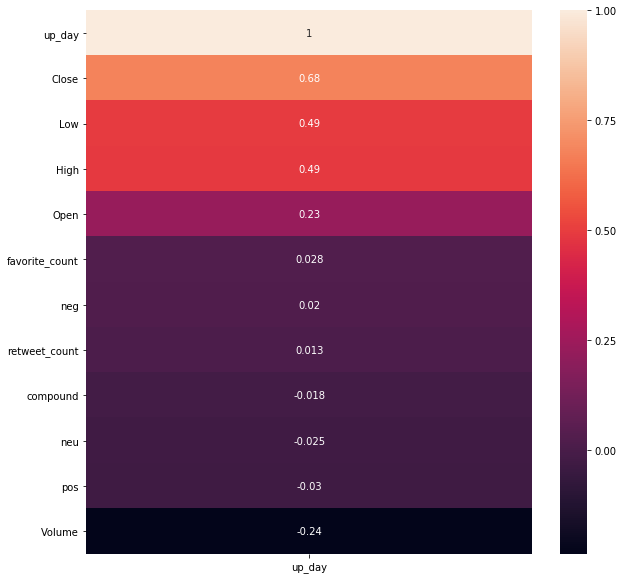

In [64]:
plt.figure(figsize = (10, 10))
corr = agg_data.corr()
corr_sort = corr.sort_values(by = ['up_day'], axis = 0, ascending = False)
sns.heatmap(corr_sort[['up_day']], annot=True)

### Saving data set to csv so able to use in other notebooks

In [65]:
agg_data.to_csv('agg_data.csv')

# Train Test Split

In [66]:
# Selecting columns that contain that variable data I need

X = agg_data[['reg_text', 'Open', 'High', 'Low', #'Close', 
              'Volume', 
              'retweet_count', 'favorite_count', 'compound',
              'neg', 'neu', 'pos']]
y = agg_data['up_day']

In [67]:
y.value_counts(normalize=True)   # This gives baseline score for predicting 'up day' or positive move in the market 
                                 # 1 is positive day and 0 is negative day

1    0.541825
0    0.458175
Name: up_day, dtype: float64

###   54.18% is baseline and average amount of time a move in SPY increases from the previous day

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y, 
                                                    test_size=0.15)

In [69]:
y_train.mean(), y_test.mean()

(0.5413870246085011, 0.5443037974683544)

In [70]:
X_train.head()

,reg_text,Open,High,Low,Volume,retweet_count,favorite_count,compound,neg,neu,pos
2018-05-02,“this isn’t some game you are screwing with t...,0.003373,0.002188,0.002480,0.163948,157788.0,631545.0,-0.7083,0.100,0.832,0.068
2016-09-14,thank you ohio just landed in canton for a ra...,-0.007215,-0.002092,0.000000,-0.266059,92033.0,244584.0,0.9719,0.000,0.824,0.176
2016-07-18,is the worst they go to their dumb one sid...,-0.003736,-0.001889,0.001672,-0.451956,34026.0,111030.0,0.9074,0.058,0.762,0.180
2015-09-30,wow so nice thank you wayne allyn root i ju...,0.011154,0.011015,0.013428,0.027705,19473.0,32468.0,0.9519,0.096,0.729,0.175
2015-10-16,@trumphiant i ve never seen a candidate as dom...,0.013745,0.004596,0.011421,-0.145831,15936.0,35377.0,0.9963,0.054,0.763,0.184


### Instantiating a CountVectorizer that will collect the texts and find the most correlated

In [71]:
cv = CountVectorizer(ngram_range=(1,3), max_features=12000, stop_words='english')

X_train_cv = cv.fit_transform(X_train['reg_text'].astype('str'))
X_test_cv = cv.transform(X_test['reg_text'].astype('str'))

In [72]:
df_X_train = pd.DataFrame(X_train_cv.todense(), columns=cv.get_feature_names())
df_X_test = pd.DataFrame(X_test_cv.todense(), columns=cv.get_feature_names())
df_X_train.head()

,abandon,abandoned,abbas,abc,abc nbc,abc news,abe,abe japan,aberdeen,abeshinzo,...,zealand,zero,zero credibility,zero work,zero work congress,zogby,zogby poll,zone,zones,zuckerman
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
df_X_train.reset_index(drop=True, inplace=True)
X_train.reset_index(drop=True, inplace=True)
df_X_test.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

In [74]:
combined_X_train = pd.concat([df_X_train, X_train], axis =1)
combined_X_train.head(1)

,abandon,abandoned,abbas,abc,abc nbc,abc news,abe,abe japan,aberdeen,abeshinzo,...,Open,High,Low,Volume,retweet_count,favorite_count,compound,neg,neu,pos
0,0,0,0,0,0,0,0,0,0,0,...,0.003373,0.002188,0.00248,0.163948,157788.0,631545.0,-0.7083,0.1,0.832,0.068


In [75]:
combined_X_test = pd.concat([df_X_test, X_test], axis = 1)

In [76]:
combined_X_train.drop(columns = 'reg_text', inplace=True)
combined_X_test.drop(columns = 'reg_text', inplace=True)

#### Checking the final shapes of both X and y data sets

In [77]:
combined_X_train.shape, combined_X_test.shape

((894, 12010), (158, 12010))

In [78]:
y_train.shape, y_test.shape

((894,), (158,))

# Model me baby

In [79]:
# Basic Logistic Regression with default parameters
lr = LogisticRegression()
lr.fit(combined_X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [80]:
lr.score(combined_X_train, y_train), lr.score(combined_X_test, y_test)

(0.5604026845637584, 0.5)

#### Basic logistic model was only 50% accurate on test data...

In [81]:
# Going to use a pipeline to put into a Gridsearch that will give best parameters for Logistic Regression model
pipe = Pipeline([('lr', LogisticRegression(n_jobs=-1))])

In [82]:
pipe_params = {
#     Ending up not using CountVectorizer in Pipeline because it kept messing with data shape.  So applied it before 
#     modeling 
#     'cv__max_features': [10000, 15000, 20000],
#     'cv__min_df': [2, 3],
#     'cv__max_df': [.9, .95],
#     'cv__ngram_range': [(1,1), (1,2), (1,3)],
#     'lr__class_weight': [None, 'balanced']   Didn't use this parameter either as all runs came up using default best
    'lr__penalty': ['l1','l2'],
    'lr__C': [0.001,0.01,0.1,1,10],
}

# Gridsearch 

In [83]:
gs = GridSearchCV(pipe, param_grid=pipe_params, cv=5, n_jobs=-1)

In [84]:
gs.fit(combined_X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('lr',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='warn',
                                                           n_jobs=-1,
                                                           penalty='l2',
                                                           random_state=None,
                                    

In [85]:
gs.best_params_

{'lr__C': 0.1, 'lr__penalty': 'l1'}

In [86]:
gs.score(combined_X_train, y_train)

0.6633109619686801

In [87]:
gs.score(combined_X_test, y_test)

0.5759493670886076

In [88]:
gs.best_score_

0.5961968680089486

In [89]:
# Using the best parameters from the Gridsearch above to create best Logistic Regression model
lr = LogisticRegression(C=0.1, verbose=1, penalty='l1', random_state=42)
lr.fit(combined_X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[LibLinear]

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=42, solver='warn', tol=0.0001, verbose=1,
                   warm_start=False)

In [90]:
lr.score(combined_X_test, y_test)

0.5759493670886076

#### The Lasso regularization performed the best in Logistic Regression model.  
#### Accuracy of 57.59% is better than baseline model of 54.18%, but not by much

In [91]:
preds_lr = lr.predict(combined_X_test)

In [92]:
cm_lr = confusion_matrix(y_test, preds_lr)
cm_lr_df = pd.DataFrame(cm_lr, columns=['predict up','predict down'], 
             index=['actual up','actual down'])
cm_lr_df

,predict up,predict down
actual up,33,39
actual down,28,58


In [93]:
print(metrics.classification_report(y_test, preds_lr))

              precision    recall  f1-score   support

           0       0.54      0.46      0.50        72
           1       0.60      0.67      0.63        86

    accuracy                           0.58       158
   macro avg       0.57      0.57      0.57       158
weighted avg       0.57      0.58      0.57       158



In [94]:
roc_auc_score(y_test, preds_lr)

0.5663759689922481

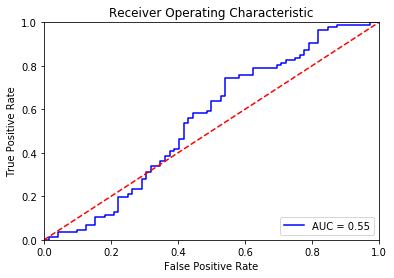

In [95]:
# calculate the fpr and tpr for all thresholds of the classification
probs = lr.predict_proba(combined_X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)


plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Having a roc_auc score of .55 is not great.  Meaning that the model doesn't do a great job of classifying into an up or down day

In [96]:
# Finding coefficients of top 12,000 words used
lr.coef_

array([[0., 0., 0., ..., 0., 0., 0.]])

In [97]:
# Taking coefficients and mapping them to their respective 'Words'
coefs = list(zip(list(lr.coef_[0]),combined_X_test.columns,))

In [98]:
# Sorting those coefficients by numeric size instead of alphabetical
coefs.sort()

In [99]:
# Shows the lowest correlated features for an Up day
low_coefs = coefs[:30]

In [100]:
# Shows the top most correlated features to an Up day
high_coefs = coefs[-30:]

In [101]:
print(1-np.exp(-0.8940857150467996))
print(1-np.exp(-0.3106629457602401))
print(1-np.exp(-0.16611488726144405))

0.5910186467468774
0.2670391181874131
0.1530510750428602


In [102]:
low_coefs

[(-0.8940857150467996, 'Volume'),
 (-0.3106629457602401, 'justice'),
 (-0.16611488726144405, 'president trump'),
 (-0.13319607406327674, 'mr'),
 (-0.13282728887570397, 'honor'),
 (-0.10597233512322016, 'wants'),
 (-0.09755525746216744, 'ohio'),
 (-0.0783938106716143, 'wall'),
 (-0.06975985839410777, 'good'),
 (-0.05440968025843304, 'country'),
 (-0.05153977352427454, 'security'),
 (-0.04837913195938315, 'joe'),
 (-0.04697332468838774, 'doing'),
 (-0.032908002498624356, 'people'),
 (-0.03050541033395895, 'trump'),
 (-0.019509093896907883, 'north'),
 (-0.015125672694345173, 'bush'),
 (-0.014666015497241417, 'debate'),
 (-0.011817605767453642, 'ted'),
 (-0.007874662841908112, 'realdonaldtrump'),
 (-0.006222997323184629, 'dbongino'),
 (-0.004194184047929741, 'think'),
 (-0.0005607401046675142, 'year'),
 (-5.6554323081289804e-05, 'way'),
 (-2.805343972102877e-06, 'retweet_count'),
 (0.0, 'High'),
 (0.0, 'Low'),
 (0.0, 'Open'),
 (0.0, 'abandon'),
 (0.0, 'abandoned')]

In [103]:
high_coefs

[(0.0, 'zogby poll'),
 (0.0, 'zone'),
 (0.0, 'zones'),
 (0.0, 'zuckerman'),
 (9.535484671003055e-07, 'favorite_count'),
 (0.003673263172669902, 'americans'),
 (0.012333643849394662, 'governor'),
 (0.014388096247668722, 'times'),
 (0.01485351220662449, 'mueller'),
 (0.017928249936323994, 'government'),
 (0.018525267028579616, 'thank'),
 (0.023924767488221258, 'bad'),
 (0.02455762595097104, 'prime'),
 (0.024992827957739744, 'new'),
 (0.02646787735006596, 'law'),
 (0.034323096569239216, 'want'),
 (0.03567645949398568, 'amp'),
 (0.03801843847183507, 'clinton'),
 (0.04084381251265826, 'national'),
 (0.042615497143376944, 'false'),
 (0.044904595529774174, 'intelligence'),
 (0.05577089403139014, 'border'),
 (0.05715182526974873, 'great'),
 (0.057167092984036445, 'did'),
 (0.05828124763970634, 'republican'),
 (0.07183370172337897, 'mexico'),
 (0.076344262076319, 'meeting'),
 (0.1015872629837697, 'hillary clinton'),
 (0.10351498254159372, 'york'),
 (0.2052925449923923, 'healthcare')]

In [104]:
# Setting up to graph Words
low_coefficients, low_item = zip(*low_coefs)

In [105]:
high_coefficients, high_item = zip(*high_coefs)

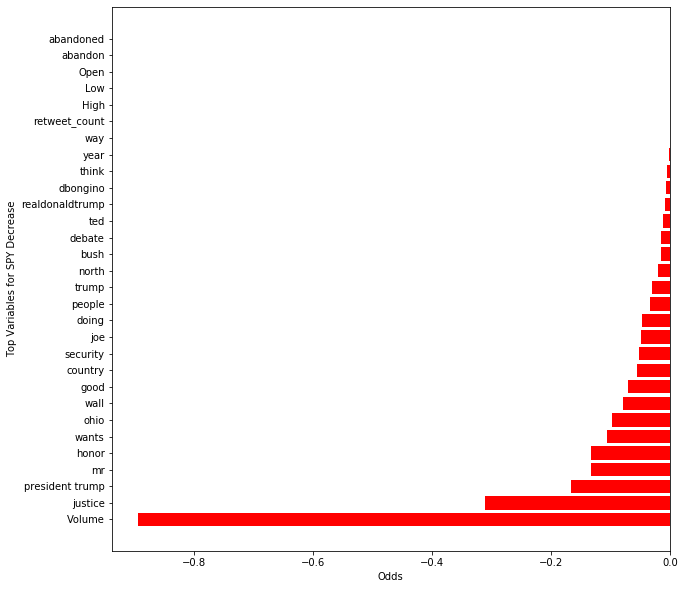

In [169]:
# Barchart of Words least correlated to an up day
plt.figure(figsize=(10,10))
plt.barh(low_item, (low_coefficients), color='red')
plt.xlim()
plt.xlabel('Log Odds')
plt.ylabel('Top Variables for SPY Decrease');

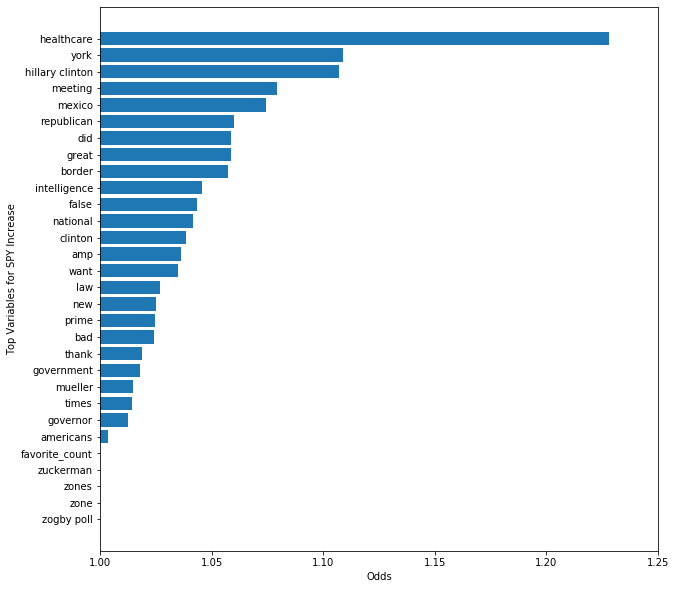

In [153]:
# Barchart of Words with highest correlation to an up day
plt.figure(figsize=(10,10))
plt.barh(high_item, np.exp(high_coefficients))
plt.xlim(1,1.25)
plt.xlabel('Odds')
plt.ylabel('Top Variables for SPY Increase');

In [154]:
print(np.exp(0.2052925449923923))
print(np.exp(0.10351498254159372))
print(np.exp(0.1015872629837697))
print(np.exp(0.076344262076319))
print(np.exp(0.07183370172337897))

1.2278842238064678
1.1090624098142743
1.1069265078874226
1.0793340839980392
1.07447664559117


In [109]:
# Since Gridsearch asked for Lasso regularization, I wanted to do a Ridge as well to see how well it would perform.
ridge_params = {
    'lr__penalty': ['l2'],
    'lr__C': [0.001,0.01,0.1,1,10],
}

In [110]:
gs_ridge = GridSearchCV(pipe, param_grid=ridge_params, cv=5, n_jobs=-1)

In [111]:
gs_ridge.fit(combined_X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('lr',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='warn',
                                                           n_jobs=-1,
                                                           penalty='l2',
                                                           random_state=None,
                                    

In [112]:
gs_ridge.best_params_

{'lr__C': 0.001, 'lr__penalty': 'l2'}

In [113]:
gs_ridge.best_score_

0.5447427293064877

In [114]:
gs_ridge.score(combined_X_train, y_train)

0.5604026845637584

In [115]:
gs_ridge.score(combined_X_test, y_test)

0.5

#### Ridge accuracy score was less than Lasso model and also worse than baseline on test data

In [116]:
# Going to use a Gradient Boost Classifier model to see if it can perform better than Logistic Regression

In [117]:
gboost = GradientBoostingClassifier(random_state=42)

In [118]:
gboost_params = {
    'learning_rate': [0.001,0.01,0.1,1],
    'min_samples_leaf': [1,2,3,4],
#     'min_samples_split': [1,2,3,4],
    'max_depth': [3,4,5,6,7]
}

In [119]:
# Un hash the code below to tune the parameters of gradient boost model
#gs_boost = GridSearchCV(gboost, param_grid=gboost_params, cv=5, n_jobs=-1)

In [120]:
#gs_boost.fit(combined_X_train, y_train)

In [121]:
#gs_boost.score(combined_X_train, y_train)

In [122]:
#gs_boost.score(combined_X_test, y_test)

In [123]:
#gs_boost.best_params_

In [124]:
#gs_boost.best_score_

In [125]:
gboost_bestmodel = GradientBoostingClassifier(learning_rate=0.1, max_depth=4, min_samples_leaf=2, random_state=42)

In [126]:
gboost_bestmodel.fit(combined_X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=4,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=2, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [127]:
gboost_bestmodel.score(combined_X_train, y_train)

0.9832214765100671

In [128]:
gboost_bestmodel.score(combined_X_test, y_test)

0.810126582278481

#### Gradient Boost performed pretty well compared to the Logistic Regression models with a score of 81% accuracy on test data
This ends up being the best model overall in terms of accuracy score!

In [129]:
# Going to use a Random Forest Classifier as well 
from sklearn.ensemble import RandomForestClassifier

In [130]:
rf = RandomForestClassifier(random_state=42)
rf.fit(combined_X_train,y_train)
rf.score(combined_X_test,y_test)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.6582278481012658

#### Random Forest performed slightly worse than Gradient Boost Classifier but better than both Logistic Regression models

# Predicting on Gradient Boost model

In [131]:
preds_gboost = gboost_bestmodel.predict(combined_X_test)

In [132]:
len(preds_gboost)

158

In [133]:
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics

In [134]:
cm_gboost = confusion_matrix(y_test, preds_gboost)

In [135]:
cm_gboost_df = pd.DataFrame(cm_gboost, columns=['predict up','predict down'], 
             index=['actual up','actual down'])
cm_gboost_df

,predict up,predict down
actual up,60,12
actual down,18,68


In [136]:
print(metrics.classification_report(y_test, preds_gboost))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80        72
           1       0.85      0.79      0.82        86

    accuracy                           0.81       158
   macro avg       0.81      0.81      0.81       158
weighted avg       0.81      0.81      0.81       158



In [137]:
roc_auc_score(y_test, preds_gboost)

0.8120155038759691

#### A roc_auc score of 0.87 means the model performs much better than any of the other models when classifying an up or down day

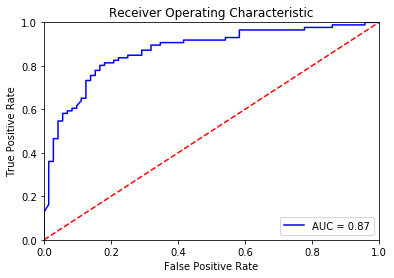

In [138]:
# Plotting roc_auc score
# calculate the fpr and tpr for all thresholds of the classification
probs = gboost_bestmodel.predict_proba(combined_X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)


plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()